### <font color= #228687>Importação dos dados



In [493]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55
2357,Cama box,moveis,921.77,46.665919,02/05/2022,Pedro Gomes,RN,1,cartao_credito,2,-5.81,-36.59


<font color= lightblue> Importando bibliotecas

In [494]:
import matplotlib.pyplot as plt

# <font color= orange>Funções

## Dados

### def somar_vendas(lista_de_vendas: list) -> dict:

In [495]:
def somar_vendas(lista_de_vendas: list) -> dict:
    """
    Soma a quantidade de vendas de cada item em múltiplas listas de vendas.

    Args:
        lista_de_vendas: Uma lista onde cada elemento é uma lista de tuplas.
                         Cada tupla representa um item vendido e sua respectiva
                         quantidade de vendas para uma loja específica.
                         O formato esperado para cada lista interna é:
                         [('Nome do Item', quantidade), ('Outro Item', quantidade), ...].

    Returns:
        Um dicionário onde as chaves são os nomes dos itens vendidos (str)
        e os valores são a soma total das quantidades vendidas desse item
        em todas as listas de vendas fornecidas (int).
    """
    total_vendas = {}
    for loja_vendas in lista_de_vendas:
        for item, quantidade in loja_vendas:
            if item in total_vendas:
                total_vendas[item] += quantidade
            else:
                total_vendas[item] = quantidade
    return total_vendas

### def valor_vendas_por_categoria(dataframe_loja) -> list:

In [496]:
def valor_vendas_por_categoria(dataframe_loja) -> list:
    """
    Recebe o dataframe de uma loja e retorna uma lista com a quantidade de vendas por categoria.

    Args:
        dataframe_loja: dataframe com os dados da loja. Deve possuir a coluna 'Categoria do Produto' e 'Preço'

    Returns:
        uma lista de tuplas com par de categoria e valor total de vendas por categoria,
        com valores arredondados para 2 casas decimais
    """
    # Inicializa dicionário para armazenar os valores de venda por categoria
    result = {}

    # Itera sobre todas as linhas do dataframe
    for i in range(len(dataframe_loja['Categoria do Produto'])):
        categoria = dataframe_loja['Categoria do Produto'][i]
        preco = dataframe_loja['Preço'][i]

        # Se a categoria ainda não existe no dicionário, cria a entrada
        if categoria not in result:
            result[categoria] = preco
        # Caso contrário, acumula o valor de venda na categoria existente
        else:
            result[categoria] += preco

    # Converte o dicionário em uma lista de tuplas e arredonda os valores para 2 casas decimais
    resultado = [(key, round(float(value), 2)) for key, value in result.items()]

    # Ordena por ordem alfabetica dos nomes das categorias
    resultado_ordenado = sorted(resultado, key=lambda item: item[0])

    return resultado_ordenado

### def lojas_valor_por_categoria(lista_todas_lojas, nome_categoria) -> list:

In [497]:
def lojas_valor_por_categoria(lista_todas_lojas, nome_categoria) -> list:
    """
    Retorna uma lista com os valores correspondentes a uma categoria específica
    em diversas lojas.

    Args:
        lista_todas_lojas (list): Lista contendo listas de tuplas, onde cada tupla representa
            uma categoria e seu valor em uma loja.
        nome_categoria (str): Nome da categoria que se deseja filtrar.

    Returns:
        list: Lista contendo apenas os valores da categoria especificada para cada loja.
    """

    valores = []

    # Itera por cada loja na lista de todas as lojas
    for loja in lista_todas_lojas:

        # Itera por cada tupla (categoria, valor) da loja
        for categoria in loja:

            # Verifica se a categoria atual é a que estamos buscando
            if categoria[0] == nome_categoria:
                # Se sim, adiciona o valor correspondente à lista de resultados
                valores.append(categoria[1])

    return valores

### def quant_vendas_por_coluna(dataframe_loja, coluna) -> list:

In [498]:
def quant_vendas_por_coluna(dataframe_loja, coluna) -> list:
    """
    Recebe o dataframe de uma loja e retorna um dicionário com a quantidade de vendas por produto.

    Args:
        dataframe_loja: dataframe com os dados da loja.
        coluna: coluna do dataframe a ser analizada para contagem dos itens

    Returns:
        uma lista de tuplas com par de categoria e quantidade de vendas organizada por valor descrecente
    """
    # Inicializa dicionário para contar ocorrências de cada item na coluna especificada
    result = {}

    # Itera sobre todos os itens da coluna selecionada
    for item in dataframe_loja[coluna]:
        # Se o item ainda não existe no dicionário, inicializa com contagem 1
        if item not in result:
            result[item] = 1
        # Se já existe, incrementa o contador do item
        else:
            result[item] += 1

    # Converte o dicionário de contagens em uma lista de tuplas (item, contagem)
    resultado = [(key, value) for key, value in result.items()]

    # Ordena por ordem alfabetica dos nomes das categorias
    resultado_ordenado = sorted(resultado, key=lambda item: item[0])

    return resultado_ordenado

### def calcular_media_coluna(dataframe_loja, coluna) -> float:

In [499]:
def calcular_media_coluna(dataframe_loja, coluna) -> float:
    """
    Recebe o dataframe de uma loja e retorna a média de uma coluna específica.

    Args:
        dataframe_loja: dataframe com os dados da loja
        coluna: nome do cabeçalho da coluna a ser avaliada

    Returns:
        float representanto a média dos valores na coluna selecionada, arredondado para 3 casas decimais
    """
    # Inicializa variável para acumular a soma dos valores
    soma = 0

    # Loop para somar todos os valores da coluna especificada
    for avaliacao in dataframe_loja[coluna]:
        soma += avaliacao

    # Calcula a média dividindo a soma pelo número de elementos
    media = soma / len(dataframe_loja[coluna])

    # Retorna o resultado arredondado para 3 casas decimais
    return round(media, 3)

### def encontrar_menor_e_porcentagens(valores: list[float]) -> dict:

In [500]:
def encontrar_menor_e_porcentagens(valores: list[float]) -> dict:
    """
    Encontra o menor valor em uma lista de números e calcula a porcentagem pela qual
    o menor valor é menor que cada um dos outros valores.

    Args:
        valores: Lista de valores numéricos

    Returns:
        dict: Dicionário contendo:
            - 'menor_valor': O menor valor da lista
            - 'valores_originais': Lista com os valores originais
            - 'porcentagens_diferenca': Lista com as porcentagens de diferença
              (0% para o próprio menor valor, e para os demais valores a porcentagem
              pela qual o menor valor é menor que esse valor)

    Raises:
        ValueError: Se a lista estiver vazia
    """
    # Verificar se a lista não está vazia
    if not valores:
        raise ValueError("A lista de valores não pode estar vazia")

    # Encontrar o menor valor
    menor = min(valores)

    # Calcular as porcentagens de diferença
    porcentagens = []

    for valor in valores:
        if valor == menor:
            porcentagens.append(0)  # O próprio menor valor tem 0% de diferença dele mesmo
        else:
            # Fórmula: (valor - menor) / valor * 100
            porcentagem = (valor - menor) / valor * 100
            porcentagens.append(porcentagem)

    # Preparar o resultado para retorno
    resultado = {
        'menor_valor': menor,
        'valores_originais': valores,
        'porcentagens_diferenca': porcentagens
    }

    return resultado

## Graficos

### def calcular_avaliacao_vendedor(dataframe_loja: pd.dataframe) -> list:

In [733]:
def avaliacao_vendedor_por_loja(dataframe_loja, nome_loja) -> object:
  resultado = {}
  len_vendedor = len(dataframe_loja['Vendedor'])
  for i in range(len_vendedor):
    vendedor = dataframe_loja['Vendedor'][i]
    avaliacao = float(dataframe_loja['Avaliação da compra'][i])
    if vendedor not in resultado:
      resultado[vendedor] = [dataframe_loja['Avaliação da compra'][i]]
    else:
      resultado[vendedor].append(dataframe_loja['Avaliação da compra'][i])

  # cores
  cores = {
        'loja1': '#1f77b4',  # Azul padrão do Matplotlib
        'loja2': '#ff7f0e',  # Laranja
        'loja3': '#2ca02c',  # Verde
        'loja4': '#d62728',  # Vermelho
  }
  cor = cores[nome_loja]

  # Separar os nomes dos vendedores e as avaliações
  nomes_vendedores = [item for item in resultado.keys()]
  avaliacoes = [sum(item) / len(item) for item in resultado.values()]

  # Criar o gráfico de barras

  plt.figure(figsize=(12, 6))
  plt.bar(nomes_vendedores, avaliacoes, color=cor)
  plt.xlabel('Vendedor')
  plt.ylabel('Avaliação')
  plt.title(f'Avaliação dos Vendedores da {nome_loja}')
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

### def produtos_mais_vendidos_quant(todas_vendas) -> object:

In [501]:
def produtos_mais_vendidos_quant(todas_vendas) -> object:
  # Calcula o total de vendas por item
  total_vendas_por_item = somar_vendas(todas_vendas)

  # Separa os nomes dos itens e as quantidades totais de vendas
  itens = list(total_vendas_por_item.keys())
  quantidades = list(total_vendas_por_item.values())

  # Ordena os itens por quantidade de vendas (decrescente para os mais vendidos)
  itens_ordenados = sorted(total_vendas_por_item.items(), key=lambda item: item[1], reverse=True)

  # Seleciona os 5 primeiros (mais vendidos) e os 5 últimos (menos vendidos)
  mais_vendidos = itens_ordenados[:5]
  menos_vendidos_ordenados = sorted(itens_ordenados[-5:], key=lambda item: item[1]) # Ordena os menos vendidos em ordem crescente

  # Combina as listas na ordem desejada
  itens_selecionados = [item[0] for item in mais_vendidos] + [item[0] for item in menos_vendidos_ordenados]
  quantidades_selecionadas = [item[1] for item in mais_vendidos] + [item[1] for item in menos_vendidos_ordenados]

  # Define as cores com intensidade crescente
  num_mais_vendidos = len(mais_vendidos)
  num_menos_vendidos = len(menos_vendidos_ordenados)

  def get_scaled_color(cmap, index, total):
      if total > 1:
          return cmap(index / (total - 1))
      elif total == 1:
          return cmap(0.7) # Tom mais forte se houver apenas um item
      else:
          return cmap(0.3) # Tom mais fraco se não houver itens

  cores_mais_vendidos = [get_scaled_color(plt.cm.Greens, len(mais_vendidos) - 1 - i, num_mais_vendidos) for i in range(num_mais_vendidos)]
  cores_menos_vendidos = [get_scaled_color(plt.cm.Reds, len(menos_vendidos_ordenados) - 1 - i, num_menos_vendidos) for i in range(num_menos_vendidos)]

  cores = cores_mais_vendidos + cores_menos_vendidos

  # Cria o gráfico de barras
  plt.figure(figsize=(12, 7))
  bars = plt.bar(itens_selecionados, quantidades_selecionadas, color=cores)
  plt.xlabel('Item')
  plt.ylabel('Total de Vendas')
  plt.title('5 Itens mais vendidos e 5 Menos Vendidos')
  plt.xticks(rotation=45, ha='right')

  # Adiciona os valores em cima de cada barra
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

  plt.tight_layout()
  plt.show()

### def grafico_quant_por_categoria(dados) -> object:

In [572]:
def grafico_quant_por_categoria(dados) -> object:
   """
   Cria um gráfico de pizza que mostra a distribuição de vendas por categoria.

   Args:
       dados: lista de tuplas, onde cada tupla contém (categoria, quantidade)

   Returns:
       object: Retorna None implicitamente, mas exibe o gráfico como efeito colateral
   """
   # Extração dos rótulos (categorias) a partir dos dados
   rotulos = [item[0] for item in dados]

   # Extração dos valores (quantidades) a partir dos dados
   dados = [item[1] for item in dados]

   # Definição da paleta de cores para o gráfico
   cores = [
       '#1f77b4',  # Azul padrão do Matplotlib
       '#ff7f0e',  # Laranja
       '#2ca02c',  # Verde
       '#d62728',  # Vermelho
       '#9467bd',  # Roxo
       '#8c564b',  # Marrom
       '#e377c2',  # Rosa
       '#7f7f7f',  # Cinza
       '#bcbd22',  # Amarelo esverdeado
       '#17becf'   # Azul claro
   ]

   # Configuração do tamanho da figura do gráfico
   plt.figure(figsize=(10, 6))

   # Criação do gráfico de pizza com percentuais formatados
   plt.pie(dados, labels=rotulos, colors=cores, autopct='%1.1f%%')

   # Adição do título ao gráfico
   plt.title('Quantidade de vendas por categoria')

   # Exibição do gráfico
   plt.show()

   # Função não retorna valor explicitamente (retorna None)
   return

### def grafico_comparativo_quant_vendas_lojas() -> object:

In [503]:
def grafico_comparativo_quant_vendas_lojas():
  categorias_nomes = [loja1_quant_vendas_categoria[i][0] for i in range(len(loja1_quant_vendas_categoria))]
  quant_vendas_loja1 = [item[1] for item in loja1_quant_vendas_categoria]
  quant_vendas_loja2 = [item[1] for item in loja2_quant_vendas_categoria]
  quant_vendas_loja3 = [item[1] for item in loja3_quant_vendas_categoria]
  quant_vendas_loja4 = [item[1] for item in loja4_quant_vendas_categoria]

  num_categorias = len(categorias_nomes)
  largura_barra = 0.1
  posicoes = list(range(num_categorias))

  plt.figure(figsize=(12, 7))

  plt.bar([p - 1.5 * largura_barra for p in posicoes], quant_vendas_loja1, largura_barra, label='Loja 1', color='#1f77b4')
  plt.bar([p - 0.5 * largura_barra for p in posicoes], quant_vendas_loja2, largura_barra, label='Loja 2', color='#ff7f0e')
  plt.bar([p + 0.5 * largura_barra for p in posicoes], quant_vendas_loja3, largura_barra, label='Loja 3', color='#2ca02c')
  plt.bar([p + 1.5 * largura_barra for p in posicoes], quant_vendas_loja4, largura_barra, label='Loja 4', color='#d62728')

  plt.xlabel('Categorias')
  plt.ylabel('Quantidade')
  plt.title('Comparação de Vendas por Categoria entre Lojas')
  plt.xticks(posicoes, categorias_nomes)
  plt.ticklabel_format(style='plain', axis='y')
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e6:.2f}M' if x >= 1e6 else f'{x/1e3:.0f}K' if x >= 1e3 else f'{x:.0f}'))
  plt.legend()
  plt.tight_layout()
  plt.show()

### def grafico_comparativo_valor_vendas_lojas() -> object:

In [504]:
def grafico_comparativo_valor_vendas_lojas():
  categorias_nomes = [loja1_quant_vendas_categoria[i][0] for i in range(len(loja1_quant_vendas_categoria))]
  valor_vendas_loja1 = [item[1] for item in loja1_valor_vendas_categoria]
  valor_vendas_loja2 = [item[1] for item in loja2_valor_vendas_categoria]
  valor_vendas_loja3 = [item[1] for item in loja3_valor_vendas_categoria]
  valor_vendas_loja4 = [item[1] for item in loja4_valor_vendas_categoria]

  num_categorias = len(categorias_nomes)
  largura_barra = 0.1
  posicoes = list(range(num_categorias))

  plt.figure(figsize=(12, 7))

  plt.bar([p - 1.5 * largura_barra for p in posicoes], valor_vendas_loja1, largura_barra, label='Loja 1', color='#1f77b4')
  plt.bar([p - 0.5 * largura_barra for p in posicoes], valor_vendas_loja2, largura_barra, label='Loja 2', color='#ff7f0e')
  plt.bar([p + 0.5 * largura_barra for p in posicoes], valor_vendas_loja3, largura_barra, label='Loja 3', color='#2ca02c')
  plt.bar([p + 1.5 * largura_barra for p in posicoes], valor_vendas_loja4, largura_barra, label='Loja 4', color='#d62728')

  plt.xlabel('Categorias')
  plt.ylabel('Valor total')
  plt.title('Comparação de Vendas por Categoria entre Lojas')
  plt.xticks(posicoes, categorias_nomes)
  plt.ticklabel_format(style='plain', axis='y')
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e6:.2f}M' if x >= 1e6 else f'{x/1e3:.0f}K' if x >= 1e3 else f'{x:.0f}'))
  plt.legend()
  plt.tight_layout()
  plt.show()

### def comparativo_de_valor_por_categoria(lista_vendas, categoria) -> object:

In [553]:
def comparativo_de_valor_por_categoria(lista_vendas, categoria) -> object:
  cores = [
        '#1f77b4',  # Azul padrão do Matplotlib
        '#ff7f0e',  # Laranja
        '#2ca02c',  # Verde
        '#d62728',  # Vermelho
    ]

  plt.figure(figsize=(10, 4))
  plt.bar(lojas_nomes, lista_vendas, color=cores)

  plt.xlabel('Nome da Loja')
  plt.ylabel('Faturamento (em milhares)') # Alteração no rótulo do eixo Y
  plt.title(f'Vendas no setor {categoria}')

  plt.ticklabel_format(style='plain', axis='y')
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e3:.2f}K'))
  plt.ylim(top=700000)

  plt.grid(axis='y', linestyle='--', alpha=0.7)

  for i, v in enumerate(lista_vendas):
      valor_formatado = f'R$ {v:,.2f}'.replace(',', '*').replace('.', ',').replace('*', '.')
      plt.text(i, v + 10000, valor_formatado, ha='center', va='bottom')

  plt.show()

### def grafico_faturamento_lojas() -> object:

In [551]:
def grafico_faturamento_lojas() -> object:
  cores = [
        '#1f77b4',  # Azul padrão do Matplotlib
        '#ff7f0e',  # Laranja
        '#2ca02c',  # Verde
        '#d62728',  # Vermelho
    ]
  largura_barra = 0.4  # Variável para controlar a largura das barras

  plt.figure(figsize=(10, 6))

  for i, nome_loja in enumerate(lojas_nomes):
      plt.bar(nome_loja, lojas_faturamento_total[i], color=cores[i], label=nome_loja, width=largura_barra)

  plt.xlabel('Nome da Loja')
  plt.ylabel('Faturamento (em milhões)')
  plt.title('Faturamento por Loja')

  plt.ticklabel_format(style='plain', axis='y')
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e6:.2f}M'))

  plt.grid(axis='y', linestyle='--', alpha=0.7)

  for i, v in enumerate(lojas_faturamento_total):
    valor_formatado = f'R$ {v:,.2f}'.replace(',', '*').replace('.', ',').replace('*', '.')
    plt.text(i, v + 10000, valor_formatado, ha='center', va='bottom')

  plt.legend()
  plt.tight_layout()

  # Ajustando o limite superior do eixo y
  limites_y = plt.gca().get_ylim()
  margem_superior = 0.1 * (limites_y[1] - limites_y[0])  # Aumenta em 10% da diferença
  plt.gca().set_ylim(limites_y[0], limites_y[1] + margem_superior)

  plt.show()

### def mostrar_compras_por_data(dataframe_loja, coluna, nome_loja) -> object:

In [728]:
def mostrar_compras_por_data(dataframe_loja, coluna, nome_loja) -> object:
  coluna_data = dataframe_loja[coluna]
  coluna_data = pd.to_datetime(coluna_data, format='%d/%m/%Y')
  coluna_data_formatada = coluna_data.dt.strftime('%Y/%m')
  coluna_data_ordenanda = coluna_data_formatada.sort_values(ascending=True)

  resultado = {}
  for item in coluna_data_ordenanda:
    if item not in resultado:
      resultado[item] = 1
    else:
      resultado[item] += 1

  # cores
  cores = {
        'loja1': '#1f77b4',  # Azul padrão do Matplotlib
        'loja2': '#ff7f0e',  # Laranja
        'loja3': '#2ca02c',  # Verde
        'loja4': '#d62728',  # Vermelho
  }
  cor = cores[nome_loja]

  # Separar as datas das quantidades
  datas = [item for item in resultado.keys()]
  quantidades = [item for item in resultado.values()]

  # Criar o gráfico de barras
  plt.figure(figsize=(12, 6))
  plt.bar(datas, quantidades, color=cor)
  plt.xlabel('Datas')
  plt.ylabel('Volume de vendas')
  plt.title(f'Volume de Venda Por Mês da {nome_loja}')
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

# <font color= green>1. Análise do faturamento
Essa seção contem uma análise do faturamento total de cada loja. Também mostra a porcentagem de aumento de uma loja para a outra com destaque para a loja que menos faturou.

#### Tratamento dos dados

In [507]:
lojas = [loja1, loja2, loja3, loja4] # DataFrames de cada loja
lojas_nomes = ['loja1', 'loja2', 'loja3', 'loja4'] # Rótulos

lojas_faturamento_total = [lojas[i]['Preço'].sum() for i in range(len(lojas))]

## <font color= navyblue>Diferença de faturamento entre as lojas em porcentagem
Loja 1: 1534509.12 (esta loja fatura 9.78% a mais que a ultima colocada)

Loja 2: 1488459.06 (esta loja fatura 6.98% a mais que a ultima colocada)

Loja 3: 1464025.03 (esta loja fatura 5.43% a mais que a ultima colocada)

Loja 4: 1384497.58 (loja que menos fatura)

In [569]:
resultado = encontrar_menor_e_porcentagens(lojas_faturamento_total)

# Exibir dados
for i, (valor, porcentagem) in enumerate(zip(resultado['valores_originais'], resultado['porcentagens_diferenca'])):
        if valor == resultado['menor_valor']:
            print(f"Loja {i+1}: {valor} (este é o menor valor)")
        else:
            print(f"Loja {i+1}: {valor} (esta loja fatura {porcentagem:.2f}% a mais que a ultima colocada)")

Loja 1: 1534509.12 (esta loja fatura 9.78% a mais que a ultima colocada)
Loja 2: 1488459.06 (esta loja fatura 6.98% a mais que a ultima colocada)
Loja 3: 1464025.03 (esta loja fatura 5.43% a mais que a ultima colocada)
Loja 4: 1384497.58 (este é o menor valor)


## <font color= #cfbb4e>Gráfico

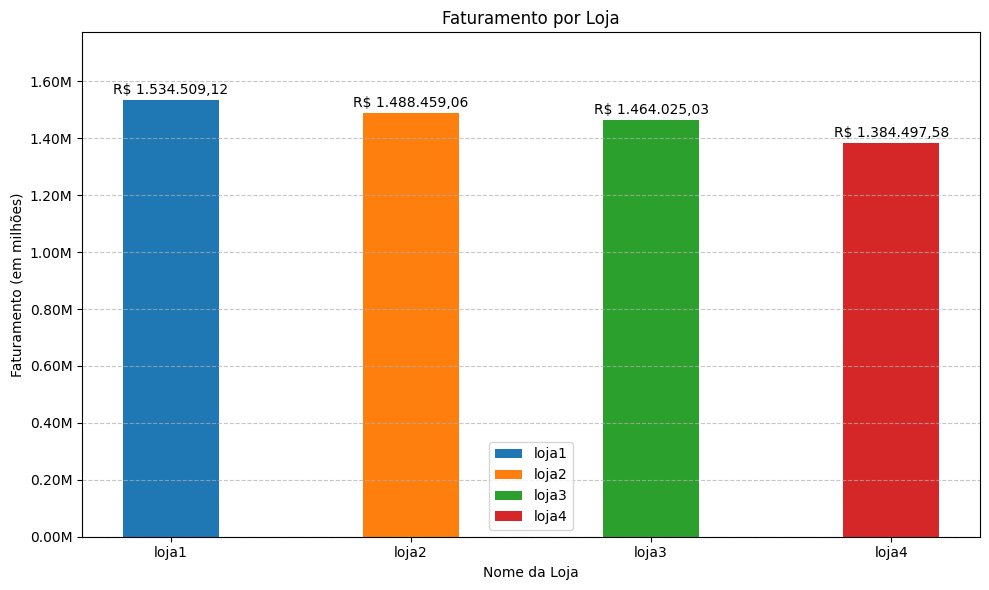

In [552]:
grafico_faturamento_lojas = grafico_faturamento_lojas()

# <font color= green>2. Vendas por Categoria
Esta seção abrange uma análise da quantidade de vendas e do valor total por categoria dividida por seções. Primeiro uma comparação entre as quatro lojas e depois uma análise mais detalhada sobre a quantidade de vendas e faturamento por categoria de cada loja.

#### Tratamento dos dados

In [510]:
# quantidade de vendas por categoria de cada loja
loja1_quant_vendas_categoria = quant_vendas_por_coluna(loja1, 'Categoria do Produto')
loja2_quant_vendas_categoria = quant_vendas_por_coluna(loja2, 'Categoria do Produto')
loja3_quant_vendas_categoria = quant_vendas_por_coluna(loja3, 'Categoria do Produto')
loja4_quant_vendas_categoria = quant_vendas_por_coluna(loja4, 'Categoria do Produto')
# quantidade de vendas por categoria de todas as lojas juntas
todas_quant_de_vendas_por_categoria = [loja1_quant_vendas_categoria, loja2_quant_vendas_categoria, loja3_quant_vendas_categoria, loja4_quant_vendas_categoria]

for i in range(len(todas_quant_de_vendas_por_categoria)):
  print(f'loja{i + 1}: {todas_quant_de_vendas_por_categoria[i]}')

# Valor das vendas por categoria de cada loja
loja1_valor_vendas_categoria = valor_vendas_por_categoria(loja1)
loja2_valor_vendas_categoria = valor_vendas_por_categoria(loja2)
loja3_valor_vendas_categoria = valor_vendas_por_categoria(loja3)
loja4_valor_vendas_categoria = valor_vendas_por_categoria(loja4)
# Valor das vendas por categoria de todas as lojas juntas
todas_valor_de_vendas_por_categoria = [loja1_valor_vendas_categoria, loja2_valor_vendas_categoria, loja3_valor_vendas_categoria, loja4_valor_vendas_categoria]

for i in range(len(todas_valor_de_vendas_por_categoria)):
  print(f'loja{i + 1}: {todas_valor_de_vendas_por_categoria[i]}')

loja1: [('brinquedos', 324), ('eletrodomesticos', 312), ('eletronicos', 448), ('esporte e lazer', 284), ('instrumentos musicais', 182), ('livros', 173), ('moveis', 465), ('utilidades domesticas', 171)]
loja2: [('brinquedos', 313), ('eletrodomesticos', 305), ('eletronicos', 422), ('esporte e lazer', 275), ('instrumentos musicais', 224), ('livros', 197), ('moveis', 442), ('utilidades domesticas', 181)]
loja3: [('brinquedos', 315), ('eletrodomesticos', 278), ('eletronicos', 451), ('esporte e lazer', 277), ('instrumentos musicais', 177), ('livros', 185), ('moveis', 499), ('utilidades domesticas', 177)]
loja4: [('brinquedos', 338), ('eletrodomesticos', 254), ('eletronicos', 451), ('esporte e lazer', 277), ('instrumentos musicais', 170), ('livros', 187), ('moveis', 480), ('utilidades domesticas', 201)]
loja1: [('brinquedos', 23993.78), ('eletrodomesticos', 484913.36), ('eletronicos', 572659.23), ('esporte e lazer', 52387.55), ('instrumentos musicais', 121731.69), ('livros', 11713.92), ('move

### <font color= lightgreen>Comparativo entre as lojas.
Comparativo das quatro lojas lado a lado por categoria.

- Quantidade

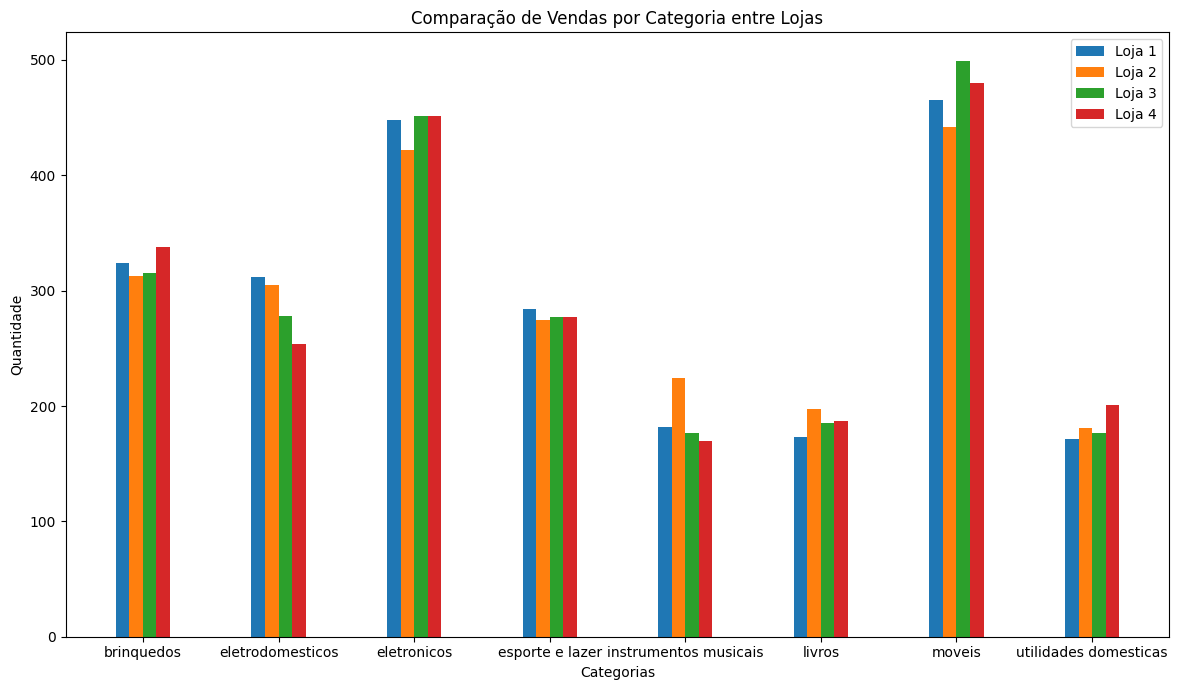

In [511]:
grafico_comparativo_quant_vendas_lojas = grafico_comparativo_quant_vendas_lojas()

- Valor

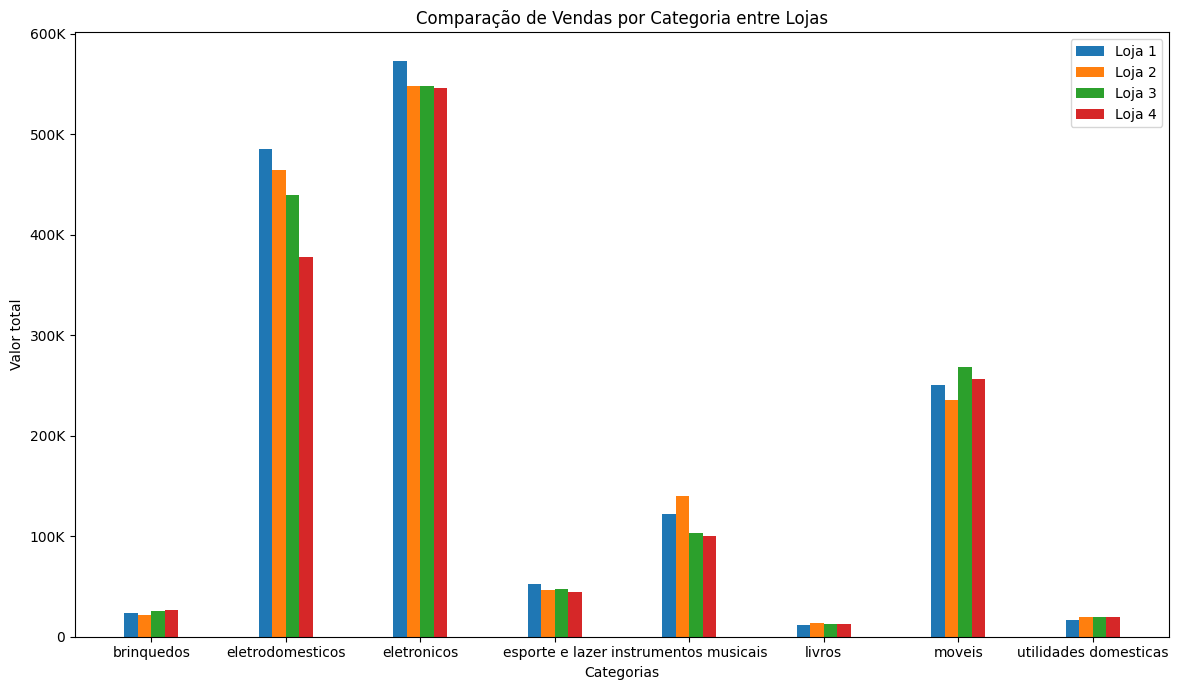

In [512]:
grafico_comparativo_valor_vendas_lojas = grafico_comparativo_valor_vendas_lojas()

### <font color= lightgreen>Detalhamento de cada loja
Um detalhamento específico de cada loja divido em quantidade de vendas por categoria e valor de vendas por categoria, com o objetivo de verificar quais categorias possuem mais vendas e quais categorias são mais rentáveis.
Esta seção apresenta gráficos individuais para cada loja e um comparativo específico entre as lojas no setor mais rentável.

#### <font color= orange>Quantidade de vendas por categoria.
Uma análise dos dados mostra que a categoria com maior quantidade de itens vendidos foi "Móveis" em todas as lojas, seguida pela categoria "Eletrônicos".

##### <font color= #cfbb4e>Gráficos

<font color= brown>Loja 1

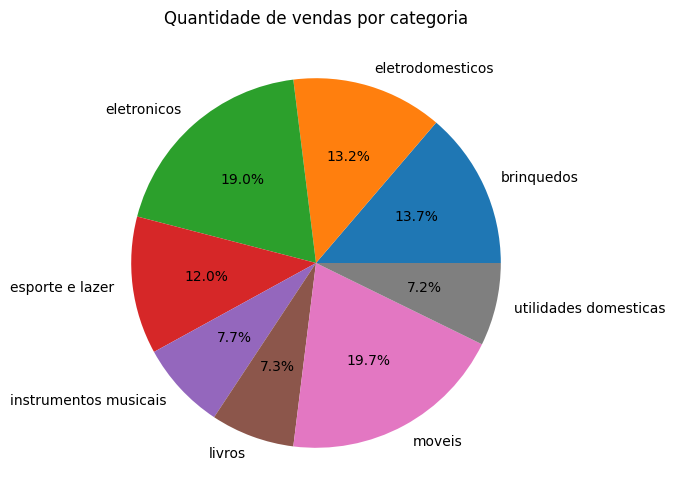

In [573]:
grafico_loja1 = grafico_quant_por_categoria(loja1_quant_vendas_categoria)

<font color= brown>Loja 2

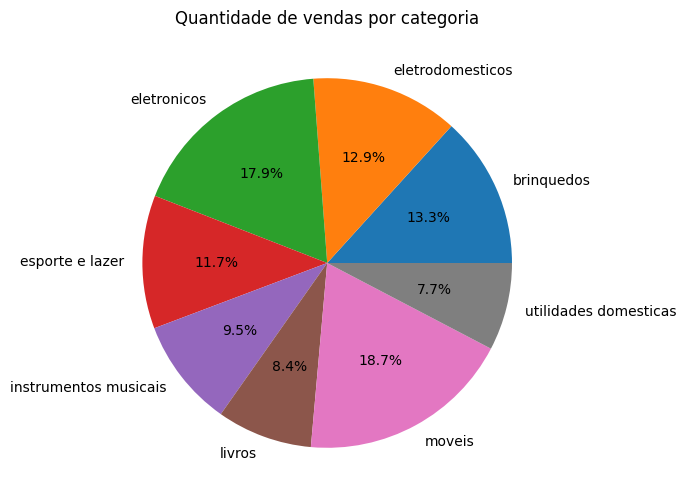

In [574]:
grafico_loja1 = grafico_quant_por_categoria(loja2_quant_vendas_categoria)

<font color= brown>Loja 3

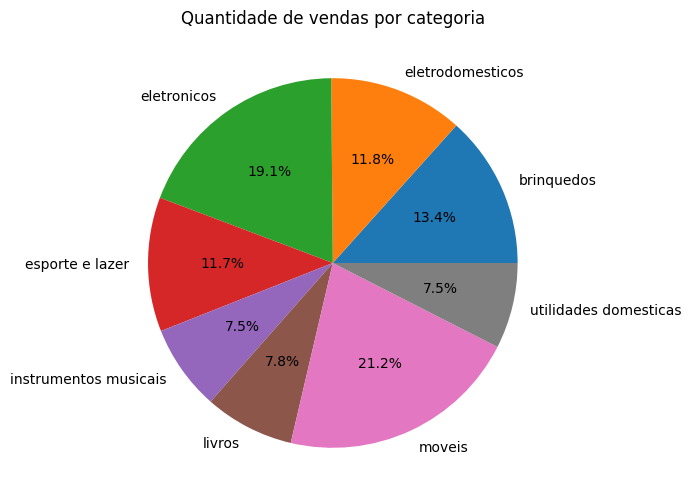

In [575]:
grafico_loja1 = grafico_quant_por_categoria(loja3_quant_vendas_categoria)

<font color= brown>Loja 4

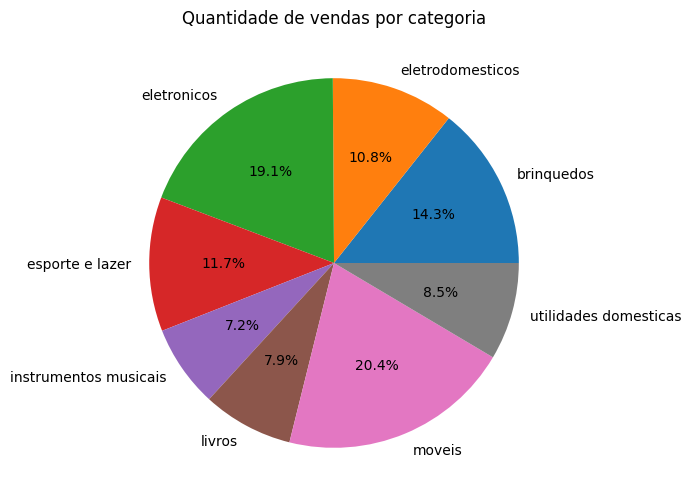

In [576]:
grafico_loja1 = grafico_quant_por_categoria(loja4_quant_vendas_categoria)

#### <font color= orange>Valor total de vendas por categoria em Reais.
Uma análise dos dados mostra que a categoria com maior valor em vendas foi "Eletrônicos" em todas as lojas, seguida pela categoria "Eletrodomésticos".

##### <font color= #cfbb4e>Gráficos

<font color= brown>Loja 1

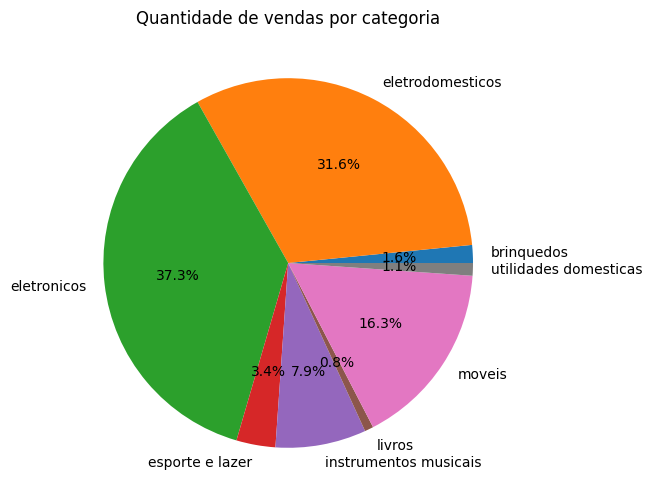

In [577]:
grafico_loja1 = grafico_quant_por_categoria(loja1_valor_vendas_categoria)

<font color= brown>Loja 2

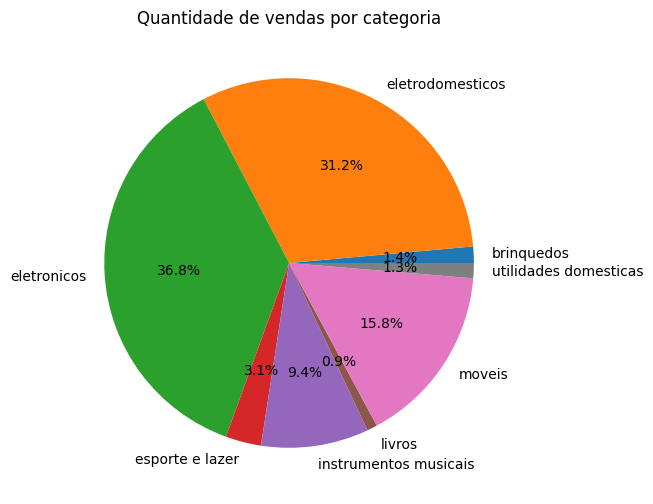

In [578]:
grafico_loja2 = grafico_quant_por_categoria(loja2_valor_vendas_categoria)

<font color= brown>Loja 3

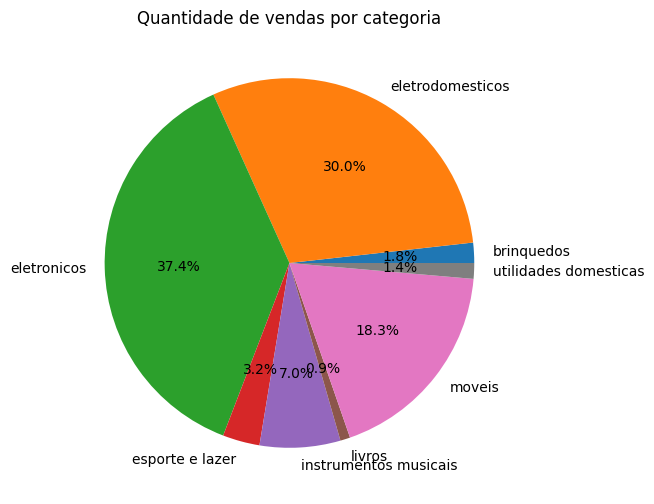

In [579]:
grafico_loja3 = grafico_quant_por_categoria(loja3_valor_vendas_categoria)

<font color= brown>Loja 4

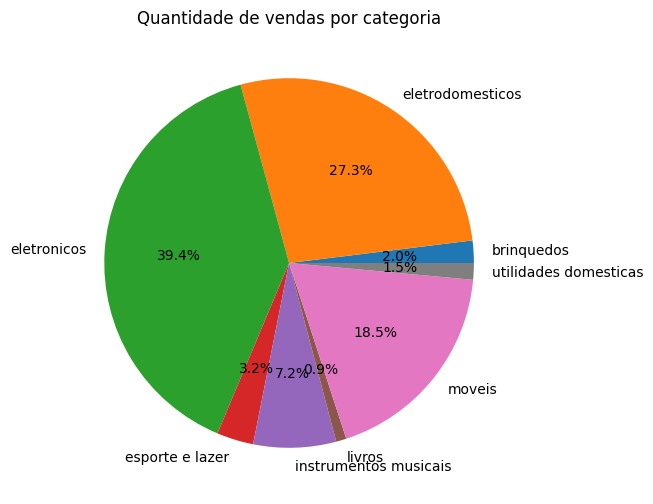

In [580]:
grafico_loja4 = grafico_quant_por_categoria(loja4_valor_vendas_categoria)

### <font color=red>Comparação entre as lojas no setor de eletrônicos

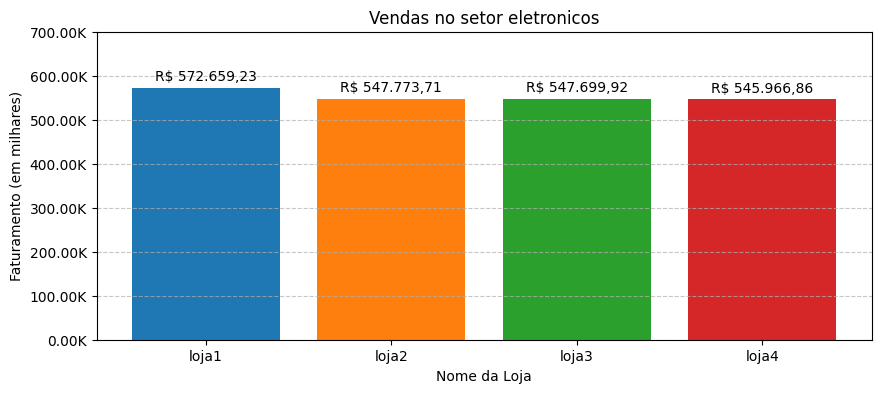

In [581]:
valores_eletronicos = lojas_valor_por_categoria(todas_valor_de_vendas_por_categoria, 'eletronicos')
comparativo_de_eletronicos = comparativo_de_valor_por_categoria(valores_eletronicos, 'eletronicos')

### <font color=red>Comparação entre as lojas no setor de móveis

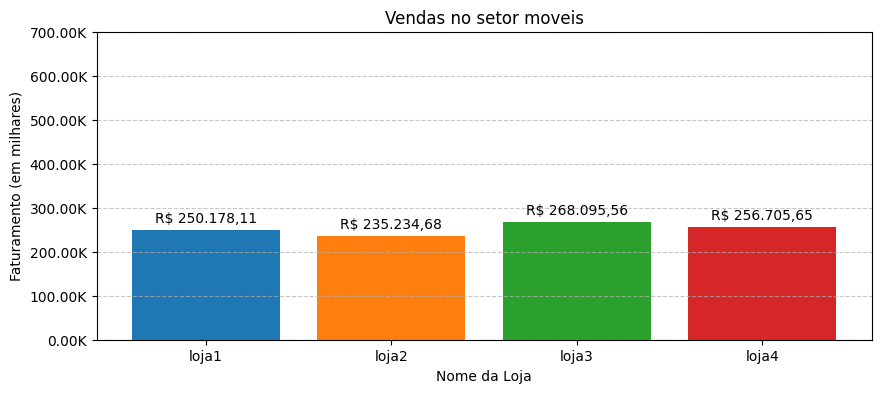

In [555]:
valores_moveis = lojas_valor_por_categoria(todas_valor_de_vendas_por_categoria, 'moveis')
comparativo_demoveis = comparativo_de_valor_por_categoria(valores_moveis, 'moveis')

### <font color=red>Comparação entre as lojas no setor de eletrodomésticos

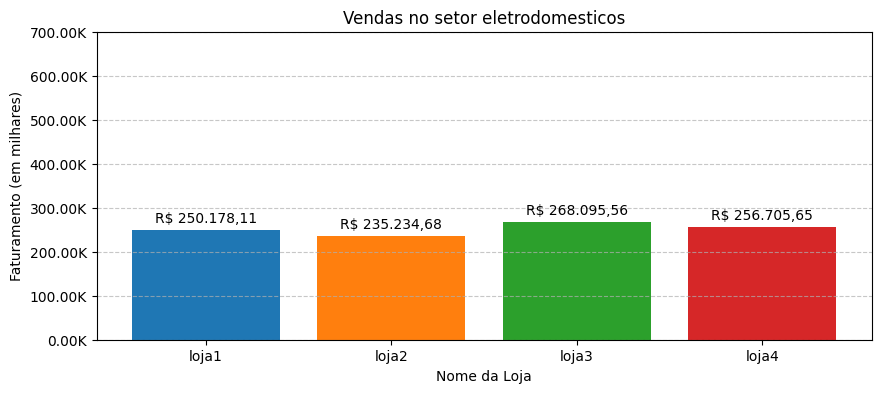

In [556]:
valores_eletrodomesticos = lojas_valor_por_categoria(todas_valor_de_vendas_por_categoria, 'eletrodomesticos')
comparativo_eletrodomesticos = comparativo_de_valor_por_categoria(valores_moveis, 'eletrodomesticos')

# <font color= green>3. Média de Avaliação das Lojas
Esta seção contém uma análise superficial da avaliação dos consumidores após cada compra.
Pode-se notar um desepenho parecido entre as lojas sendo que a seguinte hierarquia entre elas: loja3 > loja2 > loja1 > loja4.

#### Tratamento dos dados

In [608]:
media_avaliacao_lojas = [calcular_media_coluna(item, 'Avaliação da compra') for item in lojas]

### <font color=orange>Gráficos

In [604]:
media_avaliacao_lojas

[3.977, 4.037, 4.048, 3.996]

<font color= brown>Loja 1

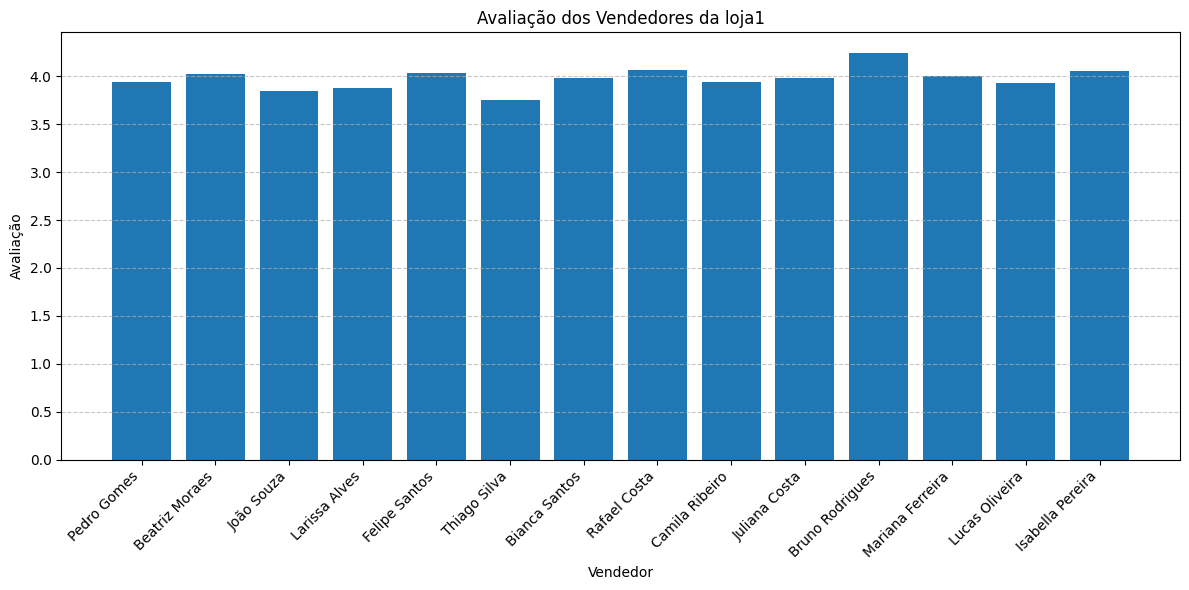

In [734]:
avaliacao_vendedor_loja1 = avaliacao_vendedor_por_loja(loja1, 'loja1')

<font color= brown>Loja 2

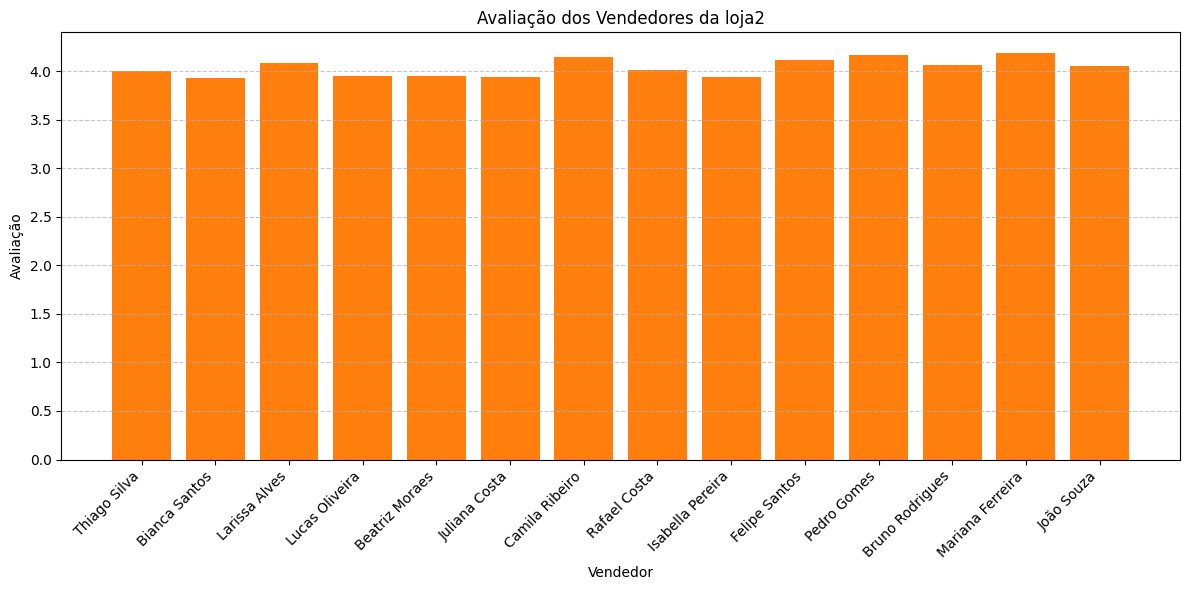

In [735]:
avaliacao_vendedor_loja2 = avaliacao_vendedor_por_loja(loja2, 'loja2')

<font color= brown>Loja 3

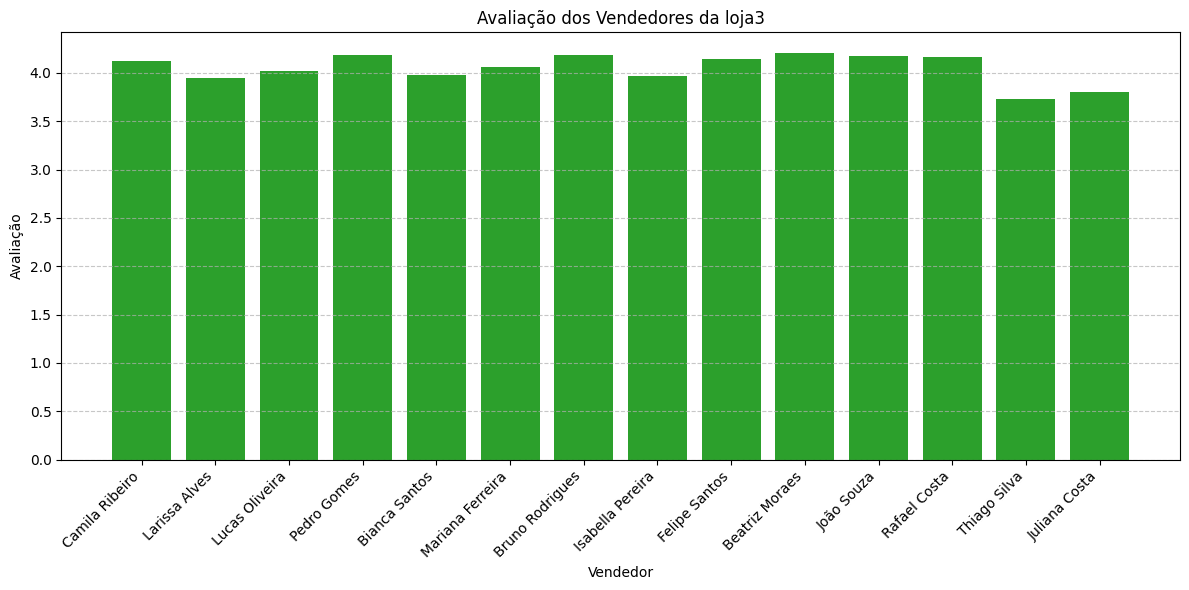

In [736]:
avaliacao_vendedor_loja3 = avaliacao_vendedor_por_loja(loja3, 'loja3')

<font color= brown>Loja 4

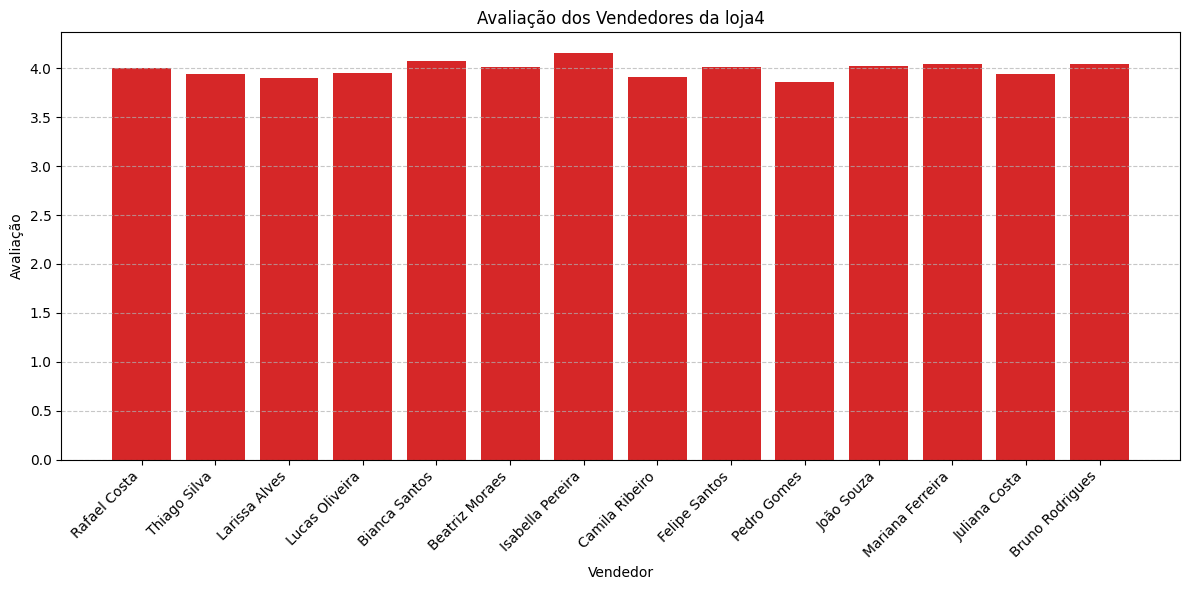

In [737]:
avaliacao_vendedor_loja4 = avaliacao_vendedor_por_loja(loja4, 'loja4')

# <font color= green>4. Produtos Mais e Menos Vendidos
Esta seção contem uma análise dos produtos individuais a fim de descobrir quais produtos foram mais vendidos.

##### Tratamento dos dados

In [524]:
# Lista com quantidade de vendas por itens de cada loja
loja1_quant_por_produto = quant_vendas_por_coluna(loja1, 'Produto')
loja4_quant_por_produto = quant_vendas_por_coluna(loja2, 'Produto')
loja3_quant_por_produto = quant_vendas_por_coluna(loja3, 'Produto')
loja2_quant_por_produto = quant_vendas_por_coluna(loja4, 'Produto')
# Lista com quantidade de vendas por item de todas as lojas juntas
todas_quant_por_produto = [loja1_quant_por_produto, loja2_quant_por_produto, loja3_quant_por_produto, loja4_quant_por_produto]

## <font color=orange>Gráficos

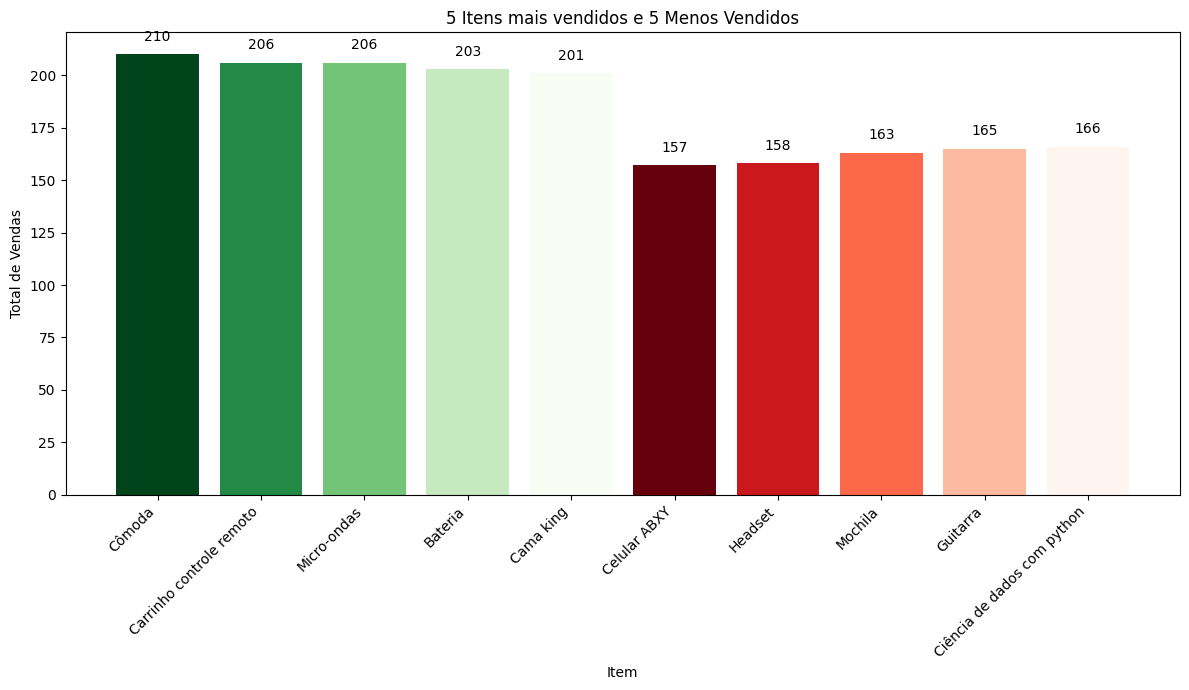

In [525]:
produtos_mais_vendidos_quant = produtos_mais_vendidos_quant(todas_quant_por_produto)

# <font color= green>5. Frete Médio por Loja
Esta seção contém uma análise do quanto se é gasto com frete em cada loja.

In [526]:
media_frete_lojas = [calcular_media_coluna(item, 'Frete') for item in lojas]
media_frete_lojas

[34.692, 33.622, 33.074, 31.279]

# <font color= green>6. Volume de vendas por Período
Esta seção contém uma análise do volume de vendas por mês de cada loja.
Pode-se notar que a loja 4 durante o mês 10/2020 teve um faturamento bem abaixo do que as outras lojas.

### <font color=orange>Gráficos

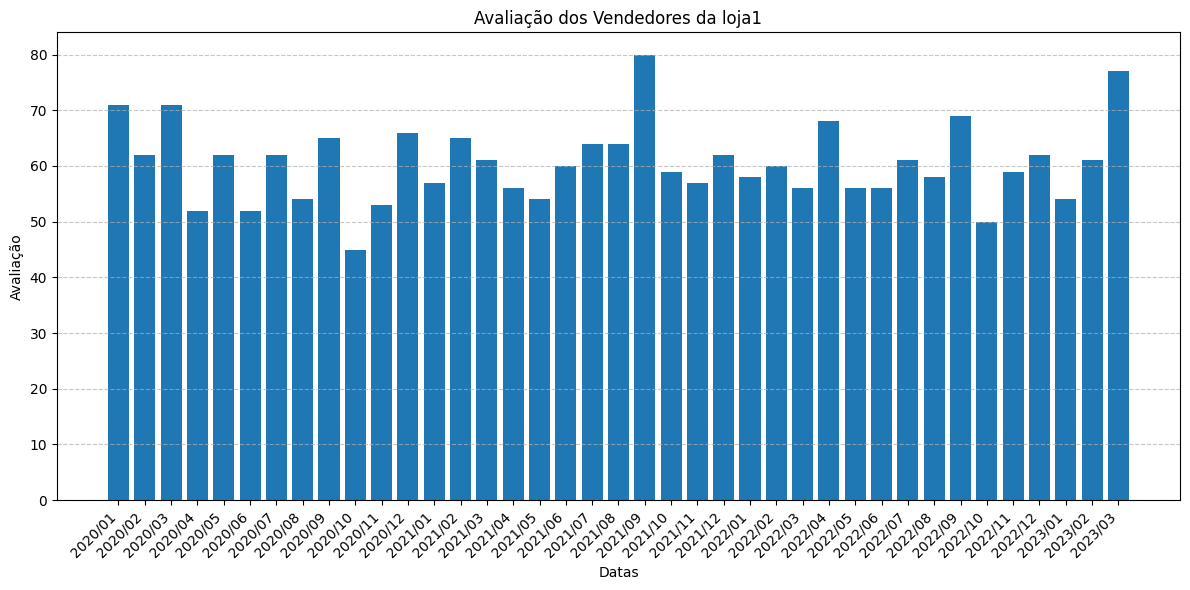

In [724]:
compra_por_data_loja1 = mostrar_compras_por_data(loja1, 'Data da Compra', 'loja1')

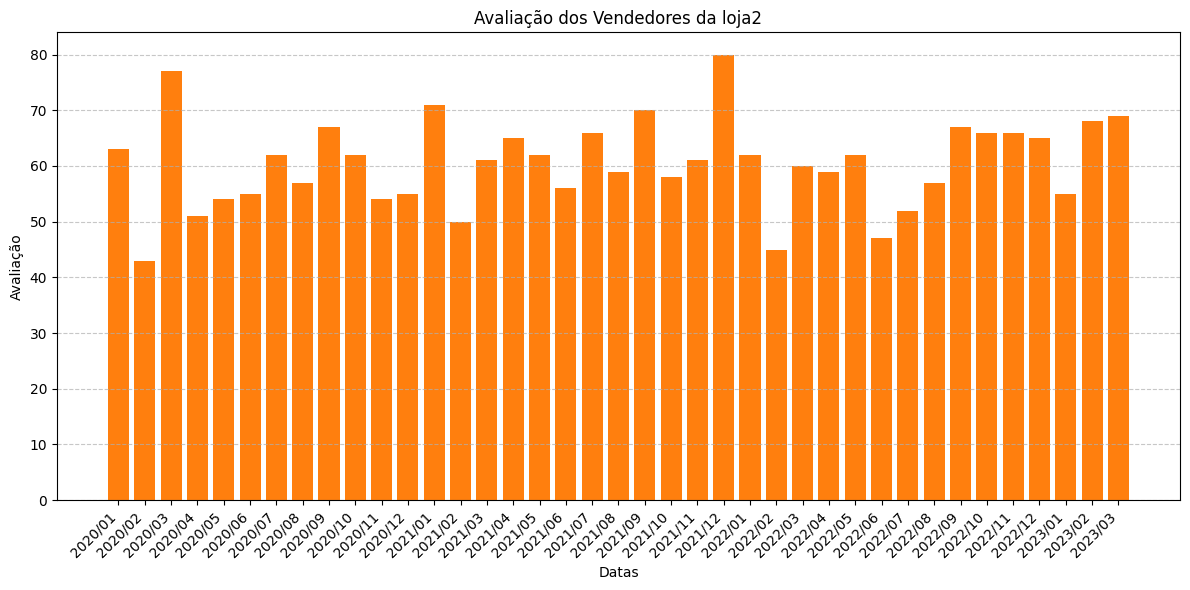

In [725]:
compra_por_data_loja2 = mostrar_compras_por_data(loja2, 'Data da Compra', 'loja2')

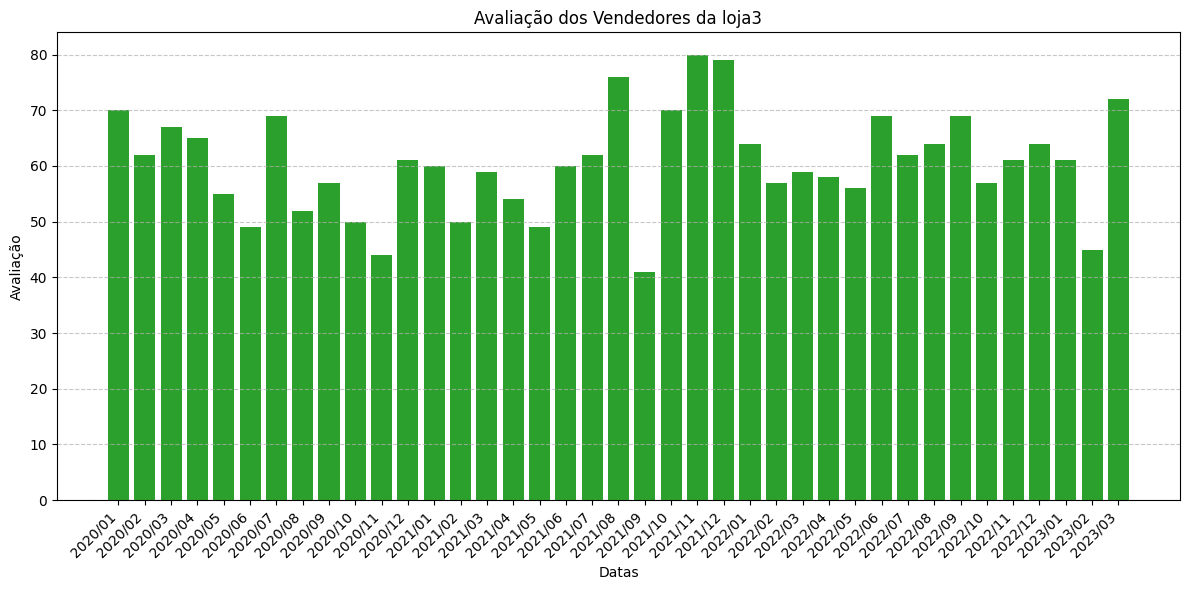

In [726]:
compra_por_data_loja2 = mostrar_compras_por_data(loja3, 'Data da Compra', 'loja3')

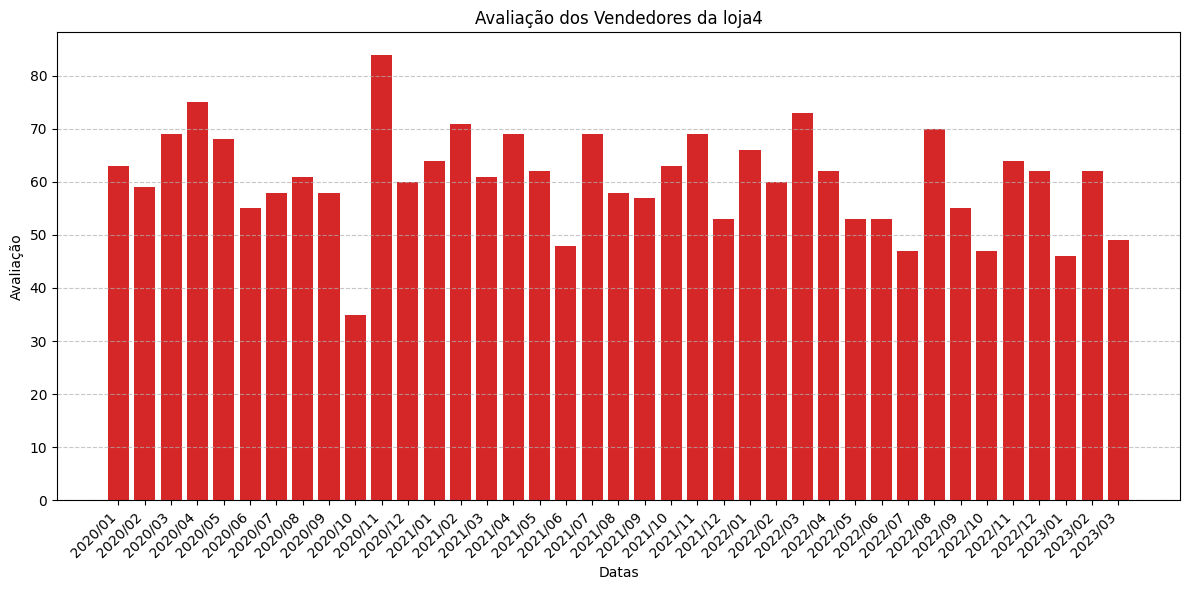

In [727]:
compra_por_data_loja2 = mostrar_compras_por_data(loja4, 'Data da Compra', 'loja4')

# <font color = red>Relatório

## Relatório de Análise de Desempenho das Lojas e Recomendação de Fechamento

**Data:** 22 de abril de 2025

**Local:** Horizontina, Estado do Rio Grande do Sul, Brasil

**Elaborado por:** Lucas Costa

## Objetivo:
Apresentar uma análise comparativa do desempenho de quatro lojas e recomendar uma para possível fechamento.

### Informações de Faturamento:

A análise do faturamento das quatro lojas revela a seguinte hierarquia de desempenho: Loja 1 > Loja 2 > Loja 3 > Loja 4.

* A **Loja 4** apresenta o menor faturamento entre as unidades analisadas.
* O faturamento da Loja 4 é **5,43% inferior** ao da penúltima colocada (Loja 3).
* A diferença de faturamento entre a Loja 4 e a primeira colocada (Loja 1) é de **9,78%**.

### Análise de Vendas por Categoria:

A análise das vendas por categorias demonstra o seguinte cenário:

* Em termos de **quantidade de vendas**, a categoria de **móveis** lidera.
* Em relação ao **faturamento**, a categoria de **eletrônicos** representa a maior parcela, seguida pela categoria de **eletrodomésticos**.

### Análise da classificação

A análise avaliação média dos clientes também não revelou disparidade muito grande entre as lojas. Um estudo mais profundo não revelou outliers que pudessem afetar os dados.

### Análise dos custos com frete

Não se pôde constatar uma disparidade grande entre as lojas. Novamente é possível ver uma perfomance similar entre as lojas com uma variação pequena entre elas.

### Análise de volume de vendas por período

Numa análise do volume de vendas por período pôde-se notar que a loja 4 durante o mês 10/2020 teve um faturamento bem abaixo do que as outras lojas.

### Conclusão e Recomendação:

Embora a análise inicial não revele uma disparidade drástica no desempenho geral das lojas, a **Loja 4** se destaca negativamente em relação ao faturamento. Apresentando um resultado consistentemente abaixo da média, com uma diferença de aproximadamente 10% em relação à loja com maior faturamento e 5% em relação à penúltima colocada. A Loja 4 se configura como uma forte candidata para possível venda.

### Sugestões para Análises Futuras:

Para uma compreensão mais aprofundada do desempenho das lojas e para auxiliar em decisões estratégicas futuras, sugere-se a realização dos seguintes estudos:

2.  **Análise de Custos de Frete e Distribuição Geográfica das Vendas:** Avaliar os custos de frete associados a cada loja e identificar a concentração geográfica de suas vendas, buscando otimizações logísticas.
3.  **Estudo de Potencial de Crescimento da Categoria de Eletrônicos:** Analisar estratégias para aumentar o volume de vendas na categoria de eletrônicos, dada sua representatividade significativa no faturamento total.